In [1]:
import tensorflow as tf

# Check how many GPUs TensorFlow can see
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# List out the specific devices
for device in tf.config.list_physical_devices():
    print(device.name)

2026-02-20 07:52:02.239037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771573922.422145      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771573922.474152      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771573922.906372      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771573922.906413      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771573922.906416      24 computation_placer.cc:177] computation placer alr

Num GPUs Available:  1
/physical_device:CPU:0
/physical_device:GPU:0


I0000 00:00:1771573948.059881      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1771573954.113076      64 service.cc:152] XLA service 0x1521d190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771573954.113110      64 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771573955.042160      64 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1771573957.604346      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Round 1/10 completed.
Round 2/10 completed.
Round 3/10 completed.
Round 4/10 completed.
Round 5/10 completed.
Round 6/10 completed.
Round 7/10 completed.
Round 8/10 completed.
Round 9/10 completed.
Round 10/10 completed.
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


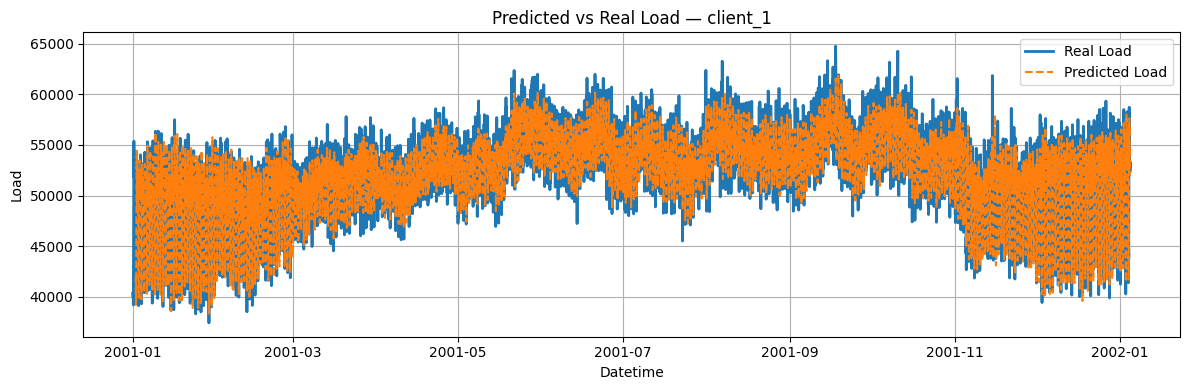

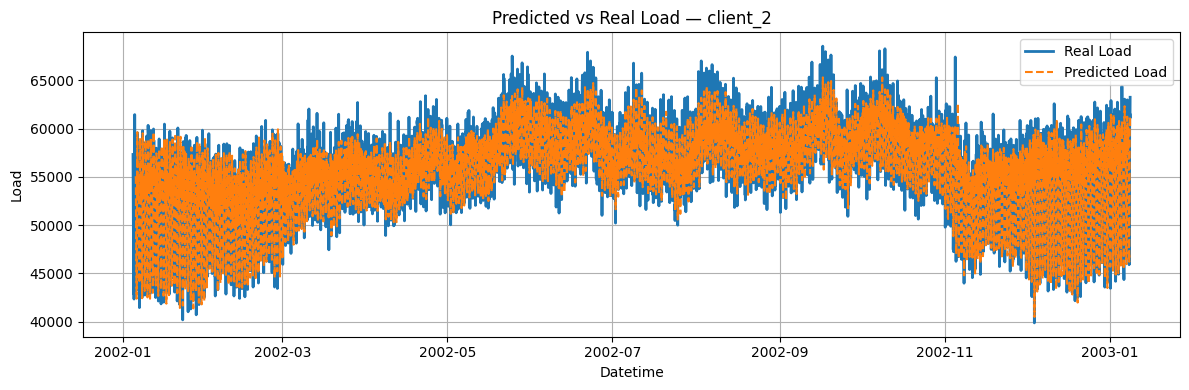

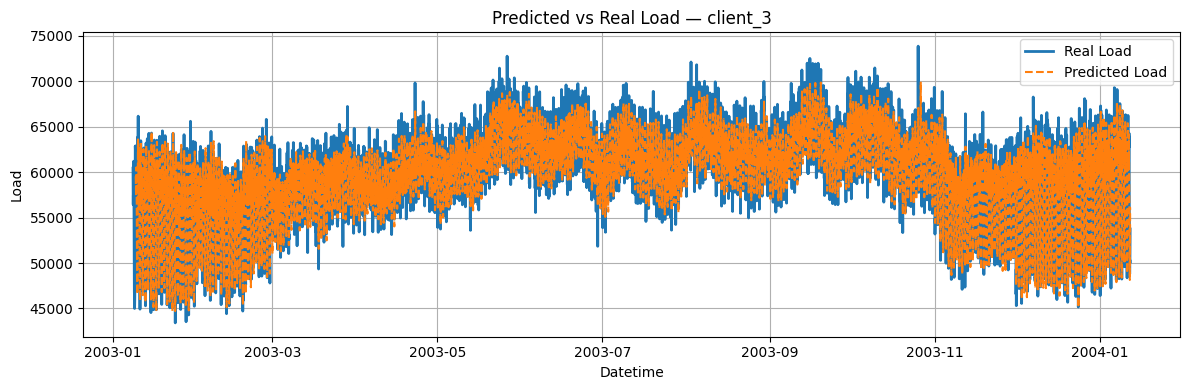

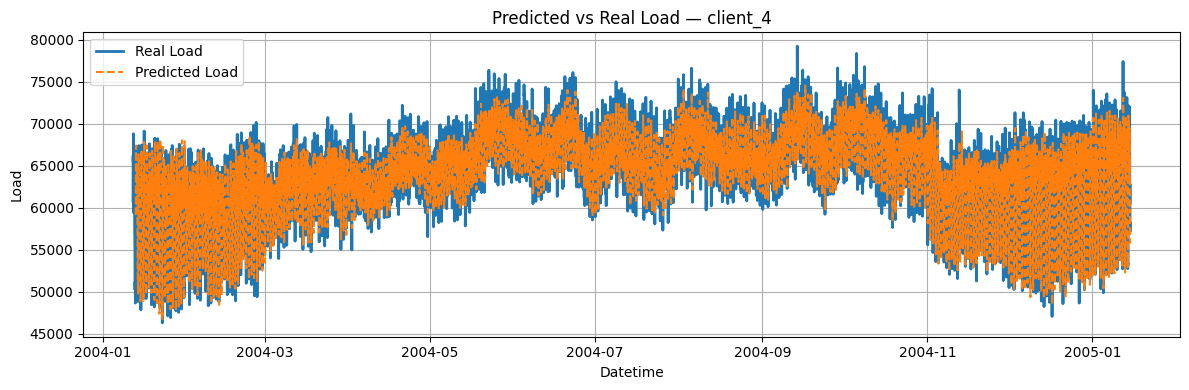

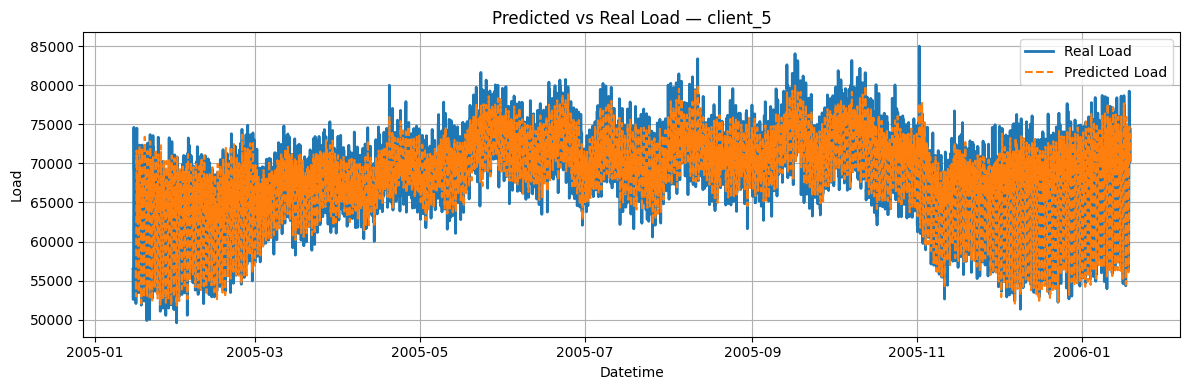

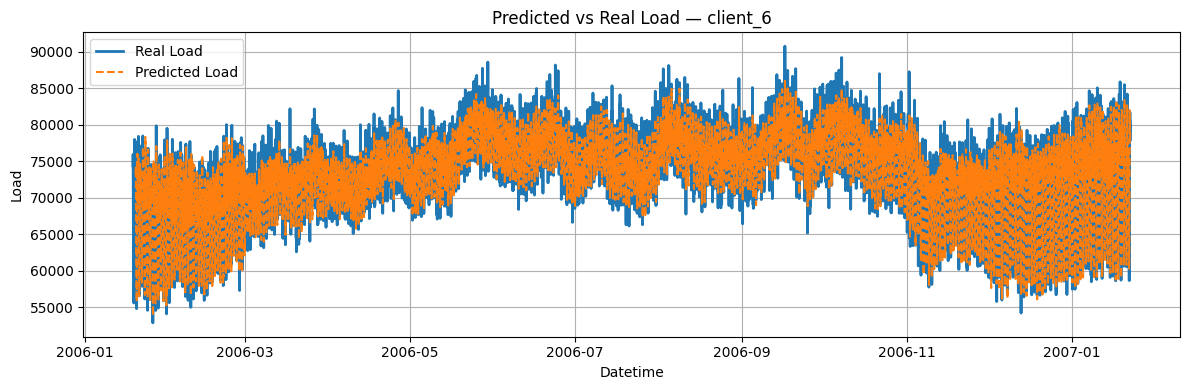

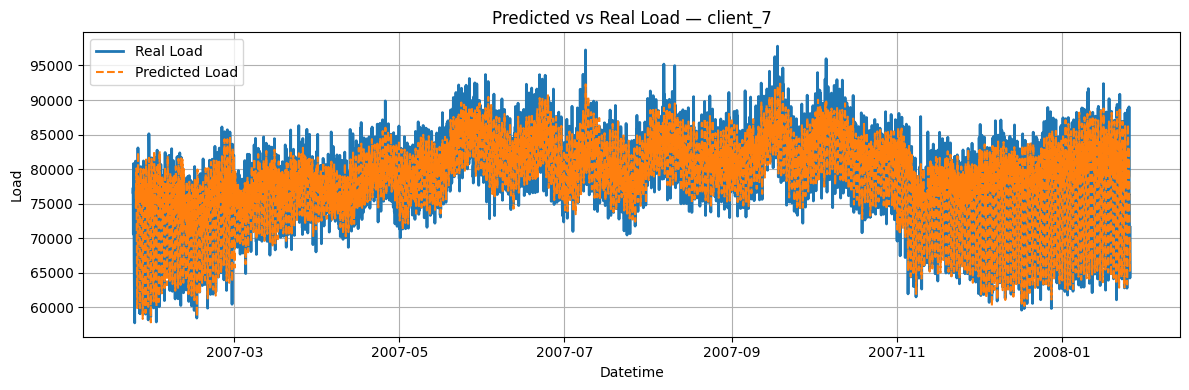

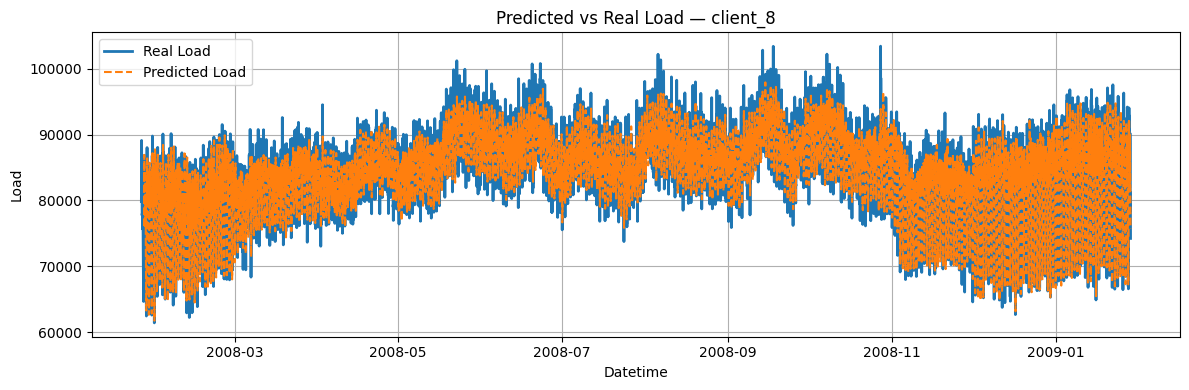

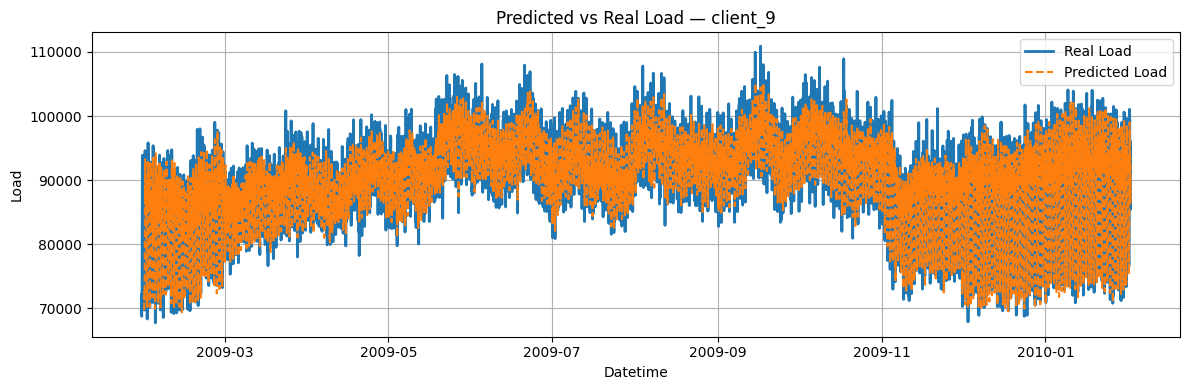

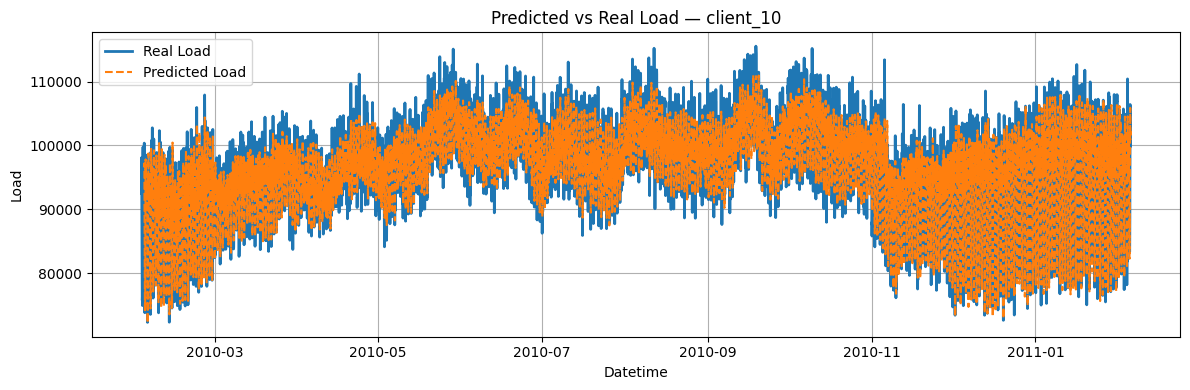

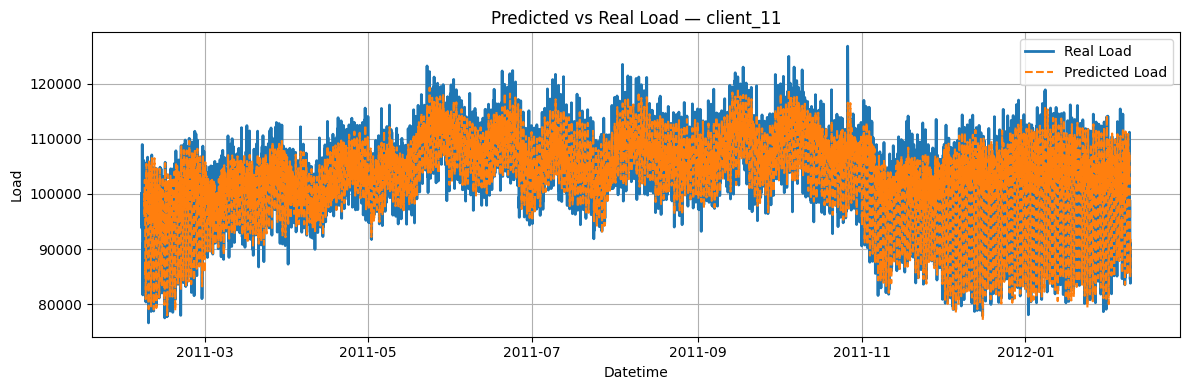

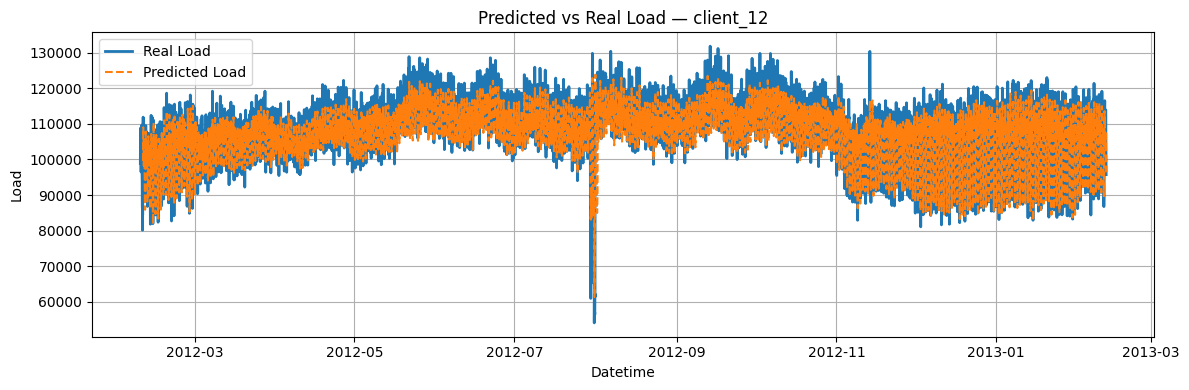

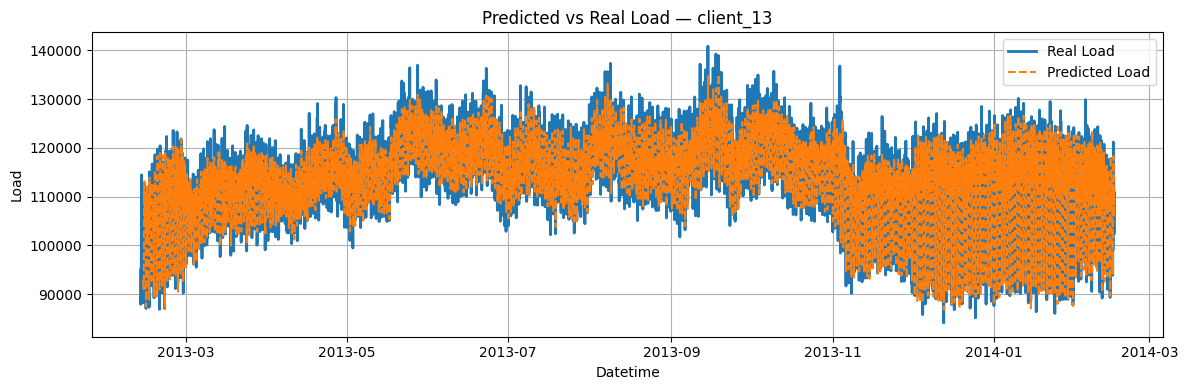

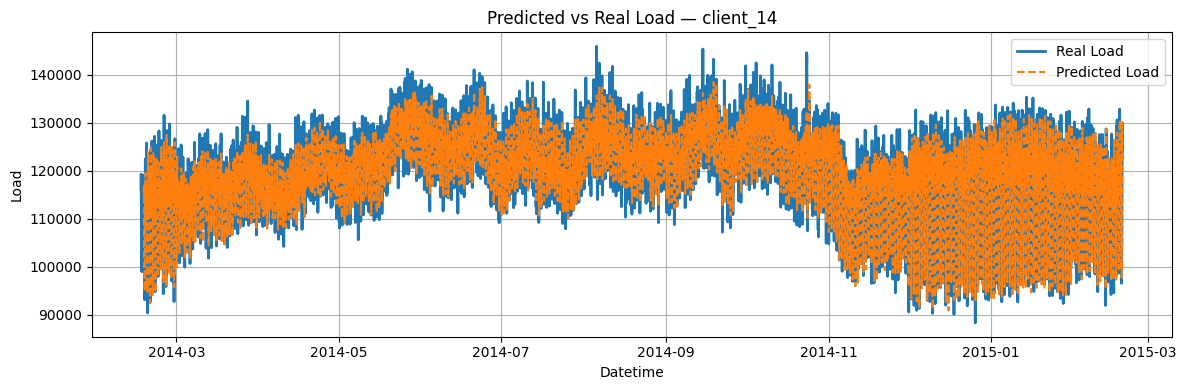

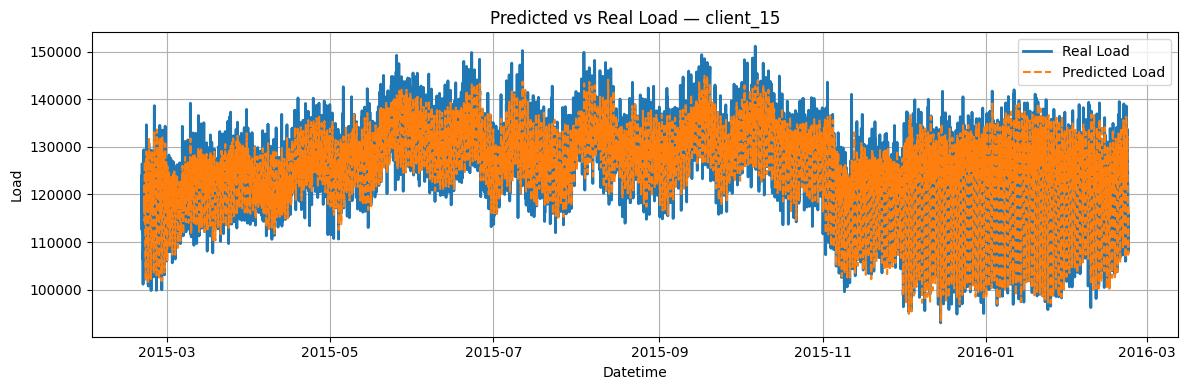

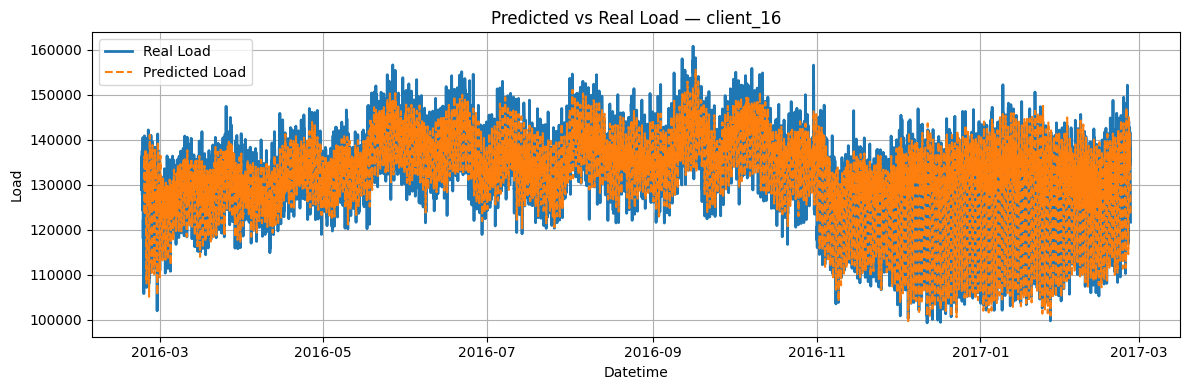

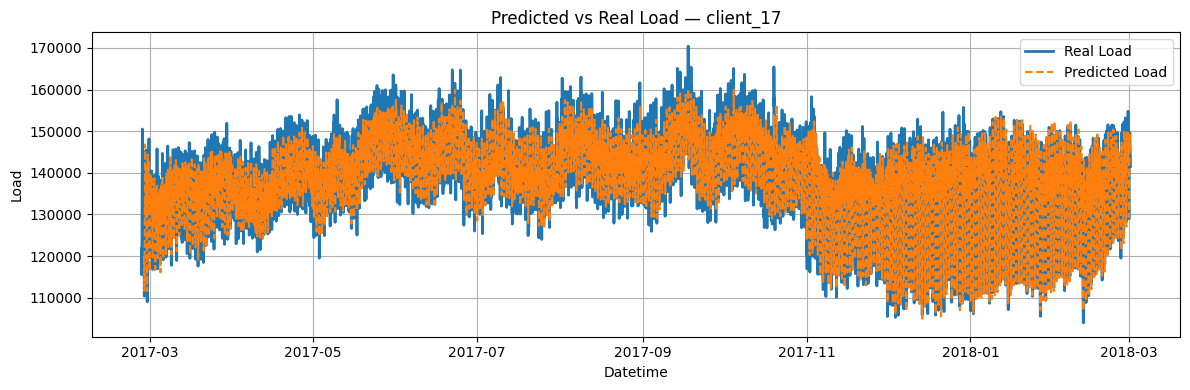

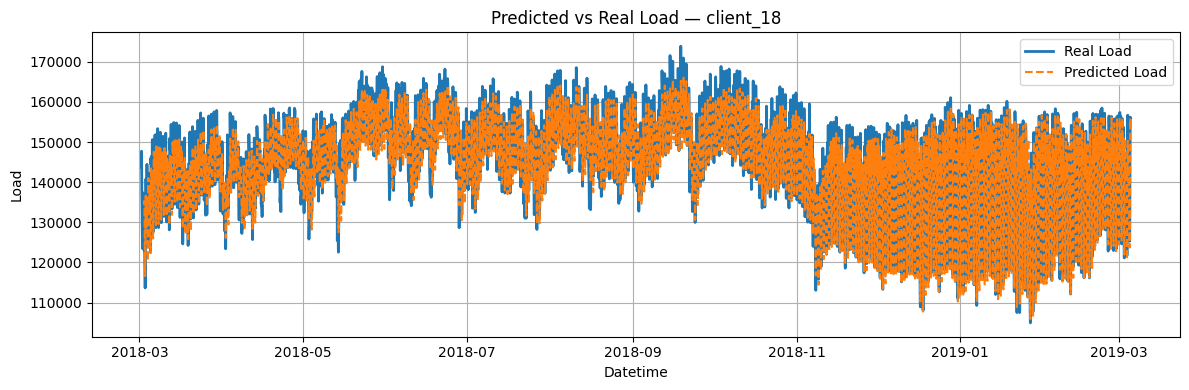

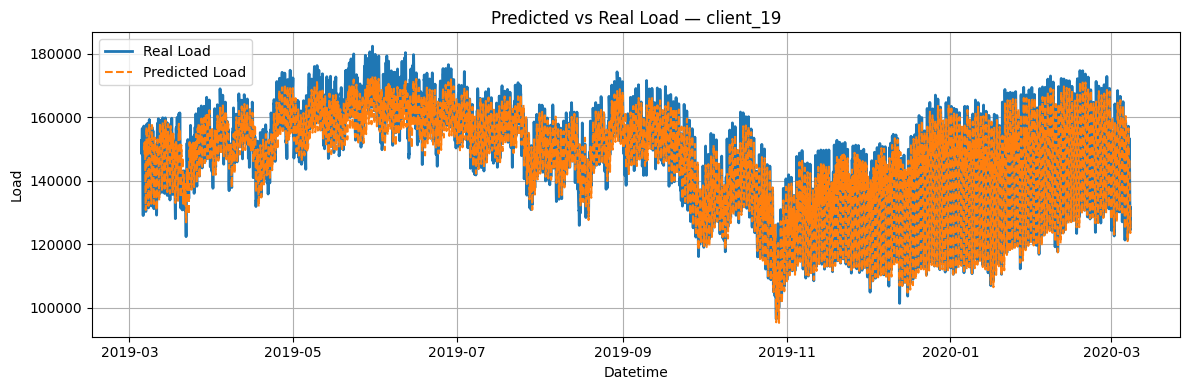

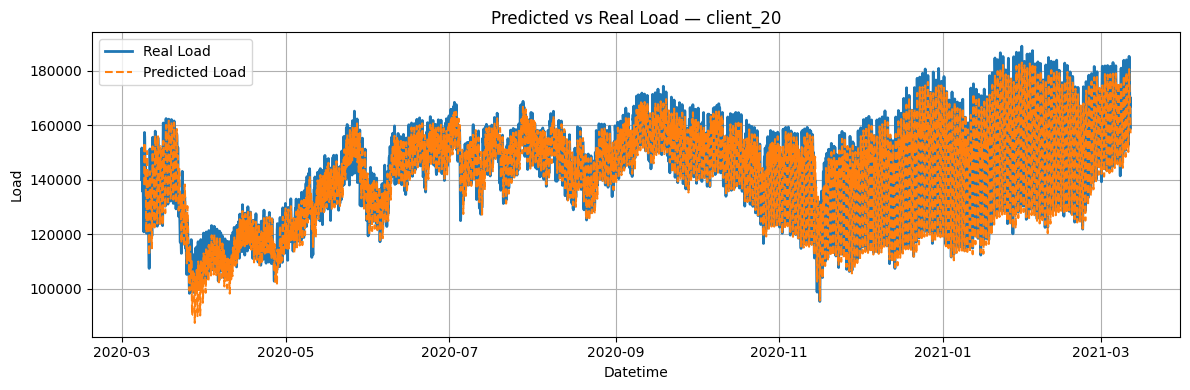

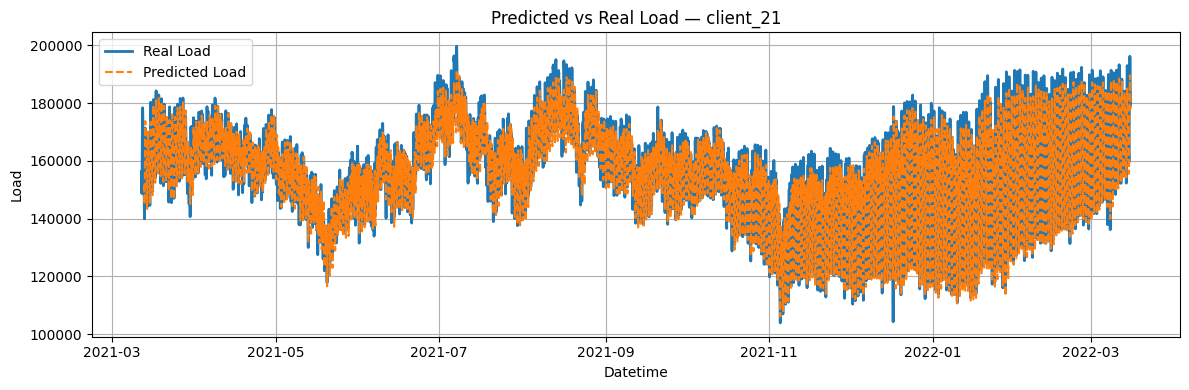

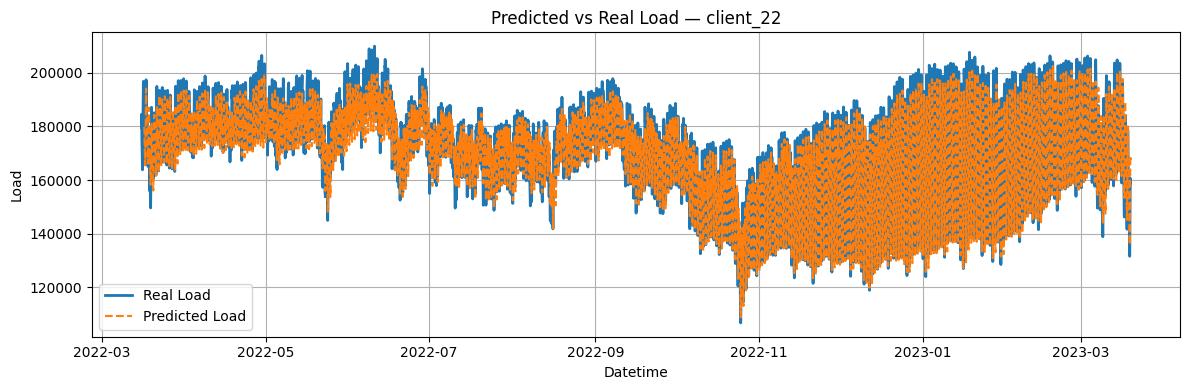

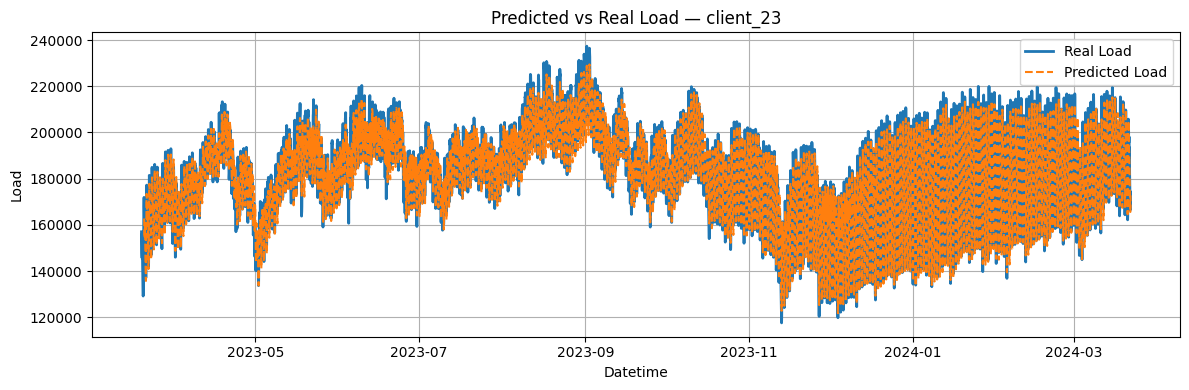

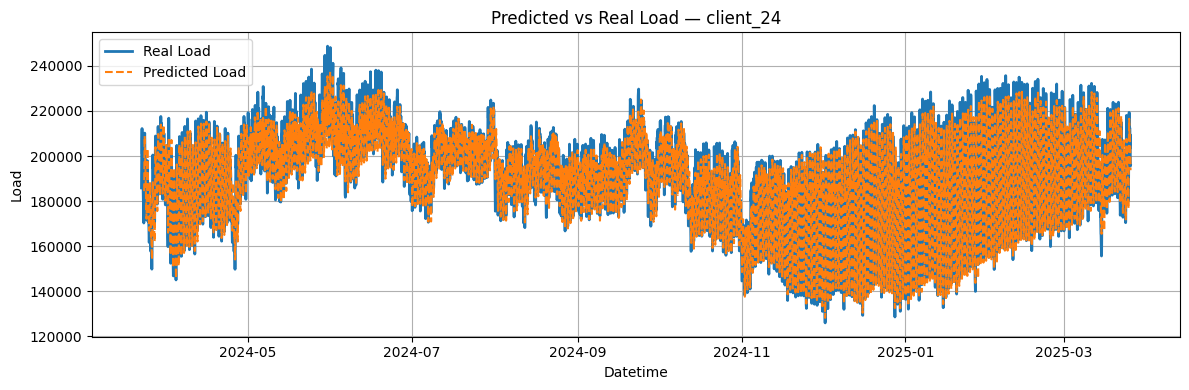

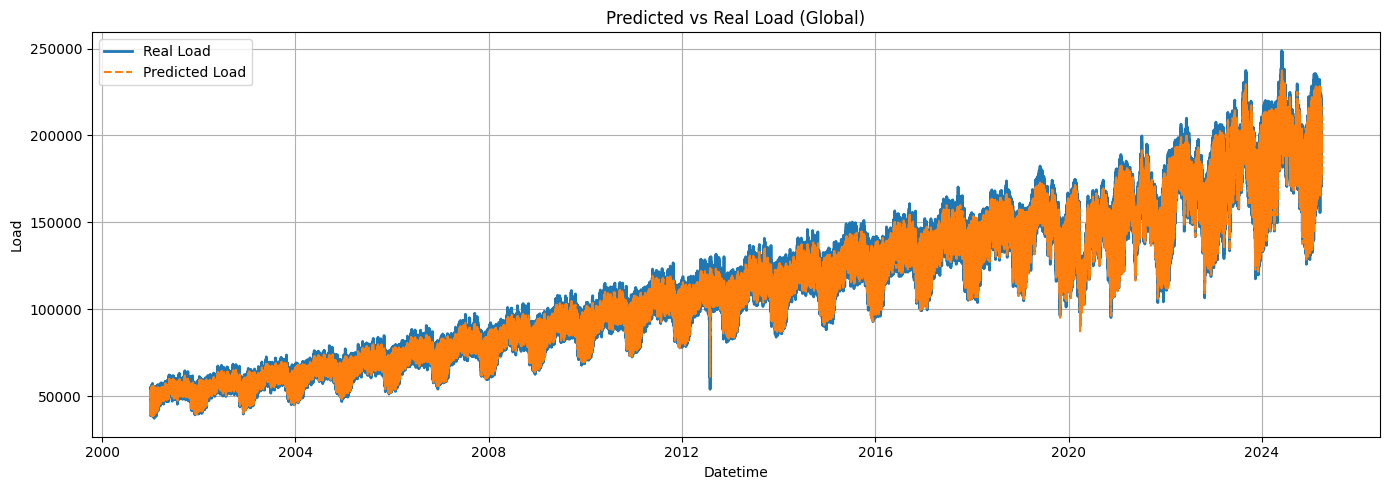

Saved client-wise and global plots to /kaggle/working/.

================= REGRESSION METRICS =================
MAE  : 2410.1146
MSE  : 10213253.4649
RMSE : 3195.8181
R²   : 0.9942
MAPE : 2.23%
Saved: global_transformer_model.h5
Model loaded and recompiled successfully.
             datetime          load  temperature_2m  relative_humidity_2m  \
0 2001-01-01 00:00:00  40346.847957       19.388505             66.967610   
1 2001-01-01 01:00:00  39937.901276       19.794711             68.447683   
2 2001-01-01 02:00:00  40443.993786       16.285200             68.190841   
3 2001-01-01 03:00:00  39179.647972       20.011719             73.060986   
4 2001-01-01 04:00:00  42157.325822       18.218764             70.586787   

   precipitation  windspeed_10m  winddirection_10m  cloudcover  pressure_msl  \
0       0.025302       9.416279          93.226634   53.299553   1011.984154   
1       0.023124       8.930091         114.633232   45.167829    972.061742   
2       0.025532       8.7

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# =====================================================================
# 1. Load Data (Kaggle Specific)
# =====================================================================
# IMPORTANT: Update 'your-dataset-name' to match the folder Kaggle created for your data.
# You can find the exact path by looking at the "Data" panel on the right side of your Kaggle notebook.
DATA_PATH = "/kaggle/input/datasets/samorion/india-complete-load-2001-2025/india_complete_load_2001_2025.csv"

# Fallback in case you uploaded it directly to the working directory instead of as a dataset
if not os.path.exists(DATA_PATH):
    DATA_PATH = "./INDIAmerged_hourly_load_weather.csv"

df = pd.read_csv(DATA_PATH)
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime").reset_index(drop=True)

# =====================================================================
# 2. Split into Federated Clients
# =====================================================================
N_CLIENTS = 24
df["client_id"] = pd.qcut(df.index, q=N_CLIENTS, labels=[f"client_{i+1}" for i in range(N_CLIENTS)])

clients = {cid: df[df["client_id"] == cid].reset_index(drop=True)
           for cid in df["client_id"].unique()}

# =====================================================================
# 3. Build time-series windows for each client
# =====================================================================
def create_timeseries(data, window=24):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data.reshape(-1, 1))

    X, y = [], []
    for i in range(window, len(scaled)):
        X.append(scaled[i-window:i, 0])
        y.append(scaled[i, 0])

    X = np.array(X).reshape(-1, window, 1)
    y = np.array(y)
    return X, y, scaler

client_X, client_y, client_scalers = {}, {}, {}

for cid, cdf in clients.items():
    X, y, scaler = create_timeseries(cdf["load"].values)
    client_X[cid] = X
    client_y[cid] = y
    client_scalers[cid] = scaler

# =====================================================================
# 4. Transformer Model
# =====================================================================
def transformer_encoder(inputs, num_heads=4, ff_dim=128):
    x = tf.keras.layers.LayerNormalization()(inputs)
    attn = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(x, x)
    x = tf.keras.layers.Add()([inputs, attn])

    ff = tf.keras.Sequential([
        tf.keras.layers.Dense(ff_dim, activation="relu"),
        tf.keras.layers.Dense(inputs.shape[-1])
    ])

    x_ff = ff(tf.keras.layers.LayerNormalization()(x))
    return tf.keras.layers.Add()([x, x_ff])


def build_model(window=24):
    inputs = tf.keras.Input(shape=(window, 1))
    x = tf.keras.layers.Dense(32)(inputs)
    x = transformer_encoder(x)
    x = transformer_encoder(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mae")
    return model

# =====================================================================
# 5. Manual Federated Averaging
# =====================================================================
def federated_avg(weights_list):
    new_weights = []
    for weights in zip(*weights_list):
        new_weights.append(np.mean(np.array(weights), axis=0))
    return new_weights

# 6. Federated Training Loop (GPU Optimized)
# =====================================================================
ROUNDS = 10

# 1. Force TensorFlow to place the models on the GPU
with tf.device('/GPU:0'):
    global_model = build_model()
    client_model = build_model() # Build exactly ONE client model to reuse

for rnd in range(1, ROUNDS + 1):
    client_weights = []

    for cid in clients.keys():
        # 2. Sync the reusable client model with global weights
        client_model.set_weights(global_model.get_weights())  

        # 3. Train the model (GPU will now stay active)
        client_model.fit(
            client_X[cid],
            client_y[cid],
            epochs=1,
            batch_size=64, # Increased from 32 to feed the GPU larger chunks of data
            verbose=0
        )

        # 4. Save the updated weights
        client_weights.append(client_model.get_weights())

    # FedAvg aggregation
    new_global_weights = federated_avg(client_weights)
    global_model.set_weights(new_global_weights)

    print(f"Round {rnd}/{ROUNDS} completed.")

# =====================================================================
# 7. Predict Full Dataset
# =====================================================================
df_pred = df.copy()
df_pred["predicted_load"] = np.nan
WINDOW = 24

for cid, cdf in clients.items():
    X, _, scaler = create_timeseries(cdf["load"].values)
    preds = global_model.predict(X)
    preds_inv = scaler.inverse_transform(preds)

    rows = df_pred[df_pred["client_id"] == cid].index
    df_pred.loc[rows[WINDOW:], "predicted_load"] = preds_inv.squeeze()

# This saves to /kaggle/working/
df_pred.to_csv("/kaggle/working/federated_predictions.csv", index=False)
print("Saved: federated_predictions.csv")

# =====================================================================
# 8. Plot Predicted vs Real (Per Client)
# =====================================================================
for cid in clients.keys():
    cdf = df_pred[df_pred["client_id"] == cid]

    plt.figure(figsize=(12, 4))
    plt.plot(cdf["datetime"], cdf["load"], label="Real Load", linewidth=2)
    plt.plot(cdf["datetime"], cdf["predicted_load"], label="Predicted Load", linestyle="--")

    plt.title(f"Predicted vs Real Load — {cid}")
    plt.xlabel("Datetime")
    plt.ylabel("Load")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/plot_{cid}.png")
    plt.show()

# =====================================================================
# 9. Combined Plot for Entire Dataset
# =====================================================================
plt.figure(figsize=(14, 5))
plt.plot(df_pred["datetime"], df_pred["load"], label="Real Load", linewidth=2)
plt.plot(df_pred["datetime"], df_pred["predicted_load"], label="Predicted Load", linestyle="--")

plt.title("Predicted vs Real Load (Global)")
plt.xlabel("Datetime")
plt.ylabel("Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/plot_global.png")
plt.show()

print("Saved client-wise and global plots to /kaggle/working/.")

# =====================================================================
# 10. Evaluation Metrics
# =====================================================================
# Drop rows where prediction is NaN (first 24 hours per client)
df_eval = df_pred.dropna(subset=["predicted_load"]).copy()

y_true = df_eval["load"].values
y_pred = df_eval["predicted_load"].values

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAE  = mean_absolute_error(y_true, y_pred)
MSE  = mean_squared_error(y_true, y_pred)
RMSE = np.sqrt(MSE)
R2   = r2_score(y_true, y_pred)
MAPE = mape(y_true, y_pred)

print("\n================= REGRESSION METRICS =================")
print(f"MAE  : {MAE:.4f}")
print(f"MSE  : {MSE:.4f}")
print(f"RMSE : {RMSE:.4f}")
print(f"R²   : {R2:.4f}")
print(f"MAPE : {MAPE:.2f}%")

# =====================================================================
# 11. Save and Reload Global Model
# =====================================================================
global_model.save("/kaggle/working/global_transformer_model.h5")
print("Saved: global_transformer_model.h5")

# Load WITHOUT compiling!
reloaded_model = tf.keras.models.load_model(
    "/kaggle/working/global_transformer_model.h5",
    compile=False
)

# Recompile manually
reloaded_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.MeanAbsoluteError()
)

print("Model loaded and recompiled successfully.")

# Verify saved CSV
df_check = pd.read_csv("/kaggle/working/federated_predictions.csv")
df_check["datetime"] = pd.to_datetime(df_check["datetime"])
print(df_check.head())